# Project 2 Code

## Importing datasets

In [5]:
import pandas as pd
df = pd.read_csv('german 2.csv', delimiter = ';') # the delimiter in the original file is ;. need to fix
df.to_csv('german fixed.csv', index = False)
df = pd.read_csv('german fixed.csv')

In [6]:
df.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [7]:
df.isna().sum() # no NIL vals

Creditability                        0
Account_Balance                      0
Duration_of_Credit_monthly           0
Payment_Status_of_Previous_Credit    0
Purpose                              0
Credit_Amount                        0
Value_Savings_Stocks                 0
Length_of_current_employment         0
Instalment_per_cent                  0
Sex_Marital_Status                   0
Guarantors                           0
Duration_in_Current_address          0
Most_valuable_available_asset        0
Age_years                            0
Concurrent_Credits                   0
Type_of_apartment                    0
No_of_Credits_at_this_Bank           0
Occupation                           0
No_of_dependents                     0
Telephone                            0
Foreign_Worker                       0
dtype: int64

## Pre-Processing

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['Credit_Amount', 'Duration_of_Credit_monthly', 'Age_years']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,-0.240857,4,2,-0.787657,1,2,4,2,...,4,2,-1.281573,3,1,1,3,1,1,1
1,1,1,-0.987573,4,0,-0.167384,1,3,2,3,...,2,1,0.040363,3,1,2,3,2,1,1
2,1,2,-0.738668,2,9,-0.861381,2,4,2,2,...,4,1,-1.105315,3,1,1,2,1,1,1
3,1,1,-0.738668,4,0,-0.407341,1,3,3,3,...,2,1,0.304750,3,1,2,2,2,1,2
4,1,1,-0.738668,4,0,-0.389974,1,3,4,3,...,4,2,0.216621,1,2,2,2,1,1,2


## Visualizing the Data

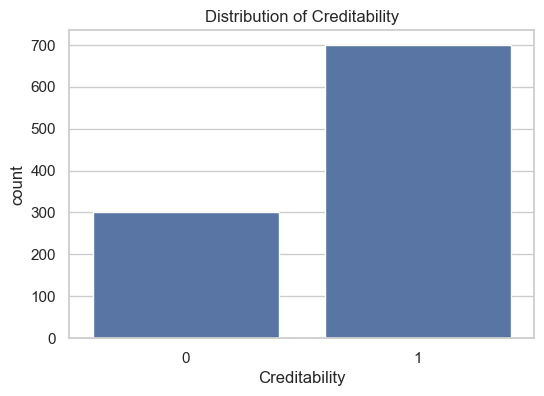

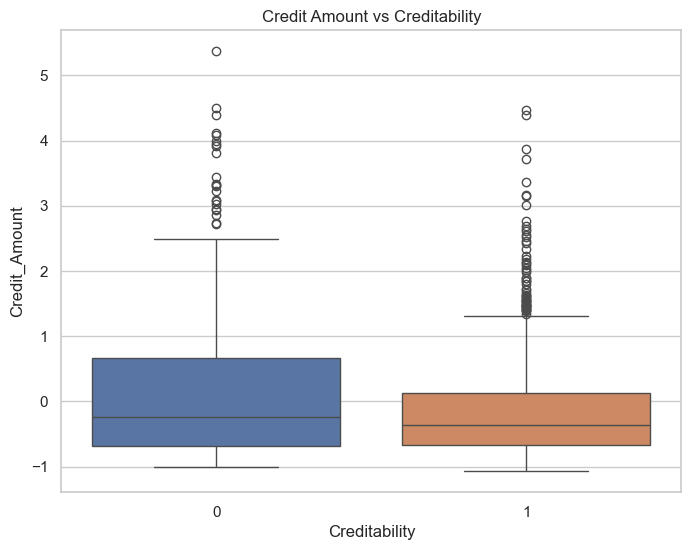

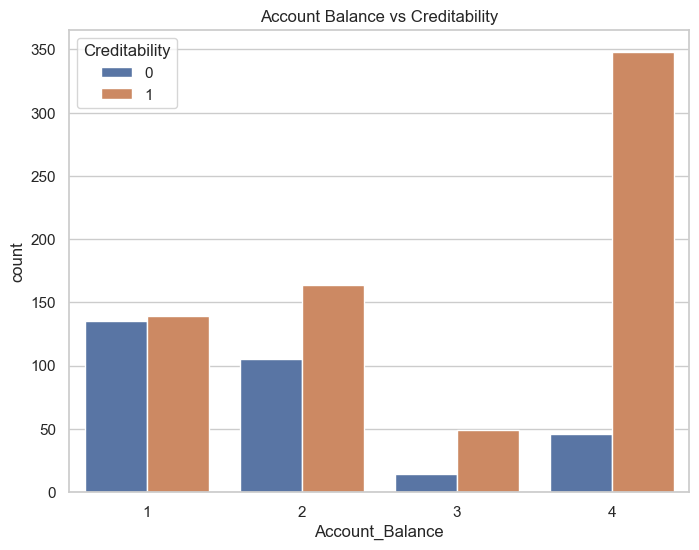

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

# Distribution of Creditability
plt.figure(figsize=(6,4))
sns.countplot(x='Creditability', data=df, hue=None, legend=False)
plt.title('Distribution of Creditability')
plt.show()

# Credit Amount v. Creditability
plt.figure(figsize=(8,6))
sns.boxplot(x='Creditability', y='Credit_Amount', hue='Creditability', data=df, dodge=False)
plt.title('Credit Amount vs Creditability')
plt.legend([], [], frameon=False)
plt.show()

# Account Balance v. Creditability
plt.figure(figsize=(8,6))
sns.countplot(x='Account_Balance', hue='Creditability', data=df)
plt.title('Account Balance vs Creditability')
plt.show()


## Modeling

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Creditability'])  # Features
y = df['Creditability']  # Target

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((800, 20), (200, 20), (800,), (200,))

## Training

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
knn_model = KNeighborsClassifier()

# Train models
rf_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)
logreg_pred = logreg_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Evaluate accuracy
rf_acc = accuracy_score(y_test, rf_pred)
logreg_acc = accuracy_score(y_test, logreg_pred)
knn_acc = accuracy_score(y_test, knn_pred)

print(f'Random Forest Accuracy: {rf_acc:.2f}')
print(f'Logistic Regression Accuracy: {logreg_acc:.2f}')
print(f'KNN Accuracy: {knn_acc:.2f}')

Random Forest Accuracy: 0.76
Logistic Regression Accuracy: 0.75
KNN Accuracy: 0.77


## Evaluation

In [24]:
from sklearn.metrics import classification_report

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))

print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.44      0.52        62
           1       0.78      0.90      0.84       138

    accuracy                           0.76       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.74      0.76      0.74       200

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.44      0.52        62
           1       0.78      0.89      0.83       138

    accuracy                           0.75       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.74      0.75      0.73       200

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.50      0.57        62
           1       0.80      0.88      0.84       138

    accuracy                           0.77       200
   macro avg       0.